In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
main = pd.read_csv("../data/main-merged.csv")

In [3]:
main.loc[(main["Country"] == "China") | (main["Country"] == "India")]

,Country,Code,Year,Sex ratio at birth,Female pop rate,5 years old,100 years old,15 years old,20 years old,30 years old,...,Excess female deaths,Missing female births,Child mortality rate (%),Fertility Rate,Life expectancy men,Life expectancy women,GDP per capita (USD),"Inflation, avg cons. prices (% change)",Unemployment rate,Missing women ratio
2448,China,CHN,1950-01-01,106.29,NaN,111.88,NaN,114.79,114.57,109.34,...,NaN,NaN,21.08,6.66,41.87,44.20,NaN,NaN,NaN,NaN
2449,China,CHN,1951-01-01,106.27,NaN,110.29,NaN,115.51,113.89,108.77,...,NaN,NaN,20.88,6.47,42.10,44.57,NaN,NaN,NaN,NaN
2450,China,CHN,1952-01-01,106.28,NaN,108.73,NaN,116.11,113.05,108.05,...,NaN,NaN,20.55,6.11,42.50,45.21,NaN,NaN,NaN,NaN
2451,China,CHN,1953-01-01,106.28,NaN,107.39,NaN,116.40,112.68,108.12,...,NaN,NaN,20.34,5.83,42.77,45.66,NaN,NaN,NaN,NaN
2452,China,CHN,1954-01-01,106.28,NaN,106.41,NaN,116.22,113.11,109.36,...,NaN,NaN,20.25,5.62,42.91,45.91,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13969,India,IND,2030-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,320000.0,470000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.773862
13970,India,IND,2035-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,290000.0,390000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.113069
13971,India,IND,2040-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,280000.0,320000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.011747
13972,India,IND,2045-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300000.0,260000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.837004


### Is there any relation between "Sex ratio at birth" and "GDP per capita"?

how much of the sex ratio at birth in China and India can be explained by country economy? 

GDP per capita contains missing values up to the 80s. For this reason, linear regression model will use a dataframe with information from the 80s up to 2017, to check the relation between GDP per capita and sex ratio at birth. 

#### For China

In [4]:
gdp_birth_c = main.loc[main["Country"] == "China"].copy()

In [5]:
gdp_birth_ch = gdp_birth_c.loc[(~gdp_birth_c["GDP per capita (USD)"].isna()) & (~gdp_birth_c["Sex ratio at birth"].isna())]

In [6]:
X1 = gdp_birth_ch[["GDP per capita (USD)"]]
X1 = sm.add_constant(X1)
y1 = gdp_birth_ch["Sex ratio at birth"]

In [7]:
model_china = sm.OLS(y1, X1).fit()
predictions_china = model_china.predict(X1)

In [8]:
 model_china.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Sex ratio at birth   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     7.784
Date:                Wed, 20 May 2020   Prob (F-statistic):            0.00838
Time:                        16:56:08   Log-Likelihood:                -98.071
No. Observations:                  38   AIC:                             200.1
Df Residuals:                      36   BIC:                             203.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  112.9784      0.695    162.672      0.000     111.570     114.387
GDP per capita (USD)     0.0006      0.000      2.790      0.008       0.000       0.001
==============================================================================
Omnibus:                        9.872   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                3.063
Skew:                          -0.312   Prob(JB):                        0.216
Kurtosis:                       1.757   Cond. No.                     4.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analysing the OLS model:

The adjusted R-squared shows us that our model can explain 0.155 of the variance in Y. 
Given our data and assuming that the null hypothesis is true, the likelyhood of obtaining a coeficient of 0.0006 (like we obtained in the model) or more extrem is equal to 0.008. Assuming that the alfa value is equal to 5%, we can discard the null hypothesis. 

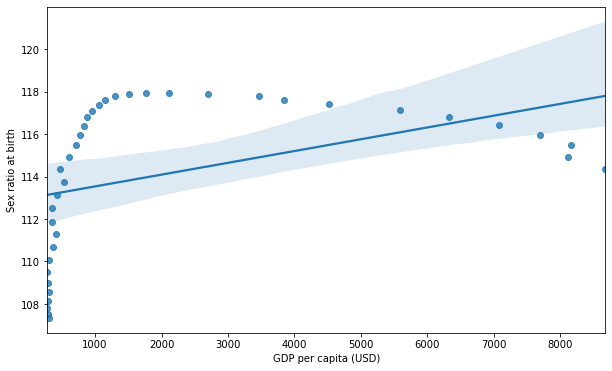

In [9]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.regplot(data = gdp_birth_ch,
           x = gdp_birth_ch["GDP per capita (USD)"],
           y = gdp_birth_ch["Sex ratio at birth"],
           ax = ax);

#### For India


In [10]:
gdp_birth_i = main.loc[main["Country"] == "India"]

In [11]:
gdp_birth_in = gdp_birth_i.loc[(~gdp_birth_i["GDP per capita (USD)"].isna()) & (~gdp_birth_i["Sex ratio at birth"].isna())]

In [12]:
X2 = gdp_birth_in[["GDP per capita (USD)"]]
X2 = sm.add_constant(X2)
y2 = gdp_birth_in["Sex ratio at birth"]

In [13]:
model_india = sm.OLS(y2, X2).fit()
predictions_india = model_india.predict(X2)

In [14]:
 model_india.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Sex ratio at birth   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                   0.09641
Date:                Wed, 20 May 2020   Prob (F-statistic):              0.758
Time:                        16:56:09   Log-Likelihood:                -53.233
No. Observations:                  38   AIC:                             110.5
Df Residuals:                      36   BIC:                             113.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  109.9688      0.282    390.353      0.000     109.397     110.540
GDP per capita (USD)  9.859e-05      0.000      0.310      0.758      -0.001       0.001
==============================================================================
Omnibus:                        1.767   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.594
Skew:                          -0.385   Prob(JB):                        0.451
Kurtosis:                       2.357   Cond. No.                     1.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analysing the OLS model:

The adjusted R-squared shows us that our model can explain -0.025 of the variance in Y. 
Given our data and assuming that the null hypothesis is true, the likelyhood of obtaining a coeficient of 9.859e-05 (like we obtained in the model) or more extrem is equal to 0.758. Assuming that the alfa value is equal to 5%, we maintain the null hypothesis. 

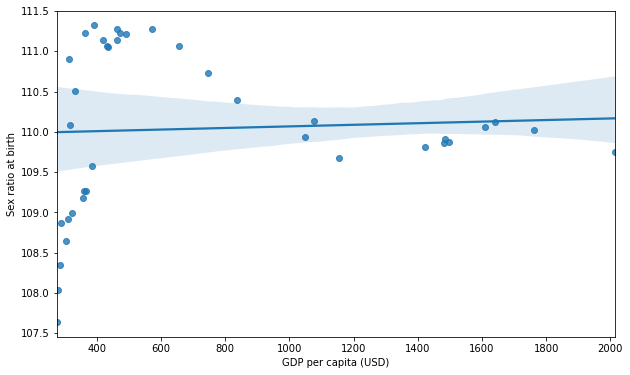

In [15]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.regplot(data = gdp_birth_in,
           x = gdp_birth_in["GDP per capita (USD)"],
           y = gdp_birth_in["Sex ratio at birth"],
           ax = ax);

### Is there any correlation between Missing Women and GDP per capita?

how much of the missing women in China and India can be explained by country economy? 

In [16]:
gdp_missing_ch = gdp_birth_c.loc[(~gdp_birth_c["GDP per capita (USD)"].isna()) & (~gdp_birth_c["Missing women"].isna())]

In [17]:
X3 = gdp_missing_ch[["GDP per capita (USD)"]]
X3 = sm.add_constant(X3)
y3 = gdp_missing_ch["Missing women"]

model_china2 = sm.OLS(y3, X3).fit()
predictions_china2 = model_china2.predict(X3)

model_china2.summary()

C:\Anaconda\envs\new_env\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Missing women   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     27.76
Date:                Wed, 20 May 2020   Prob (F-statistic):            0.00116
Time:                        16:56:09   Log-Likelihood:                -153.68
No. Observations:                   9   AIC:                             311.4
Df Residuals:                       7   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.027e+07    3.1e+06     12.975      0.000    3.29e+07    4.76e+07
GDP per capita (USD)  3384.7234    642.409      5.269      0.001    1865.668    4903.779
==============================================================================
Omnibus:                        1.100   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                0.632
Skew:                          -0.061   Prob(JB):                        0.729
Kurtosis:                       1.708   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analysing the OLS model:

The adjusted R-squared shows us that our model can explain 0.770 of the variance in Y. 
Given our data and assuming that the null hypothesis is true, the likelyhood of obtaining a coeficient of 3384.7234 (like we obtained in the model) or more extrem is equal to 0.001. Assuming that the alfa value is equal to 5%, we can discard the null hypothesis. 

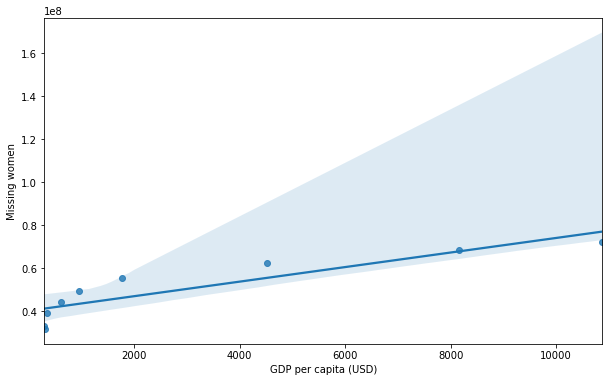

In [18]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.regplot(data = gdp_missing_ch,
           x = gdp_missing_ch["GDP per capita (USD)"],
           y = gdp_missing_ch["Missing women"],
           ax = ax);

for India

In [19]:
gdp_missing_in = gdp_birth_i.loc[(~gdp_birth_i["GDP per capita (USD)"].isna()) & (~gdp_birth_i["Missing women"].isna())]

In [20]:
X4 = gdp_missing_in[["GDP per capita (USD)"]]
X4 = sm.add_constant(X4)
y4 = gdp_missing_in["Missing women"]

model_india2 = sm.OLS(y4, X4).fit()
predictions_india2 = model_india2.predict(X4)

model_india2.summary()

C:\Anaconda\envs\new_env\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Missing women   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     17.04
Date:                Wed, 20 May 2020   Prob (F-statistic):            0.00442
Time:                        16:56:09   Log-Likelihood:                -148.07
No. Observations:                   9   AIC:                             300.1
Df Residuals:                       7   BIC:                             300.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.113e+07   2.07e+06     15.054      0.000    2.62e+07     3.6e+07
GDP per capita (USD)  7575.5568   1835.253      4.128      0.004    3235.873    1.19e+04
==============================================================================
Omnibus:                        0.651   Durbin-Watson:                   0.535
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.592
Skew:                          -0.356   Prob(JB):                        0.744
Kurtosis:                       1.965   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analysing the OLS model:

The adjusted R-squared shows us that our model can explain 0.667 of the variance in Y. 
Given our data and assuming that the null hypothesis is true, the likelyhood of obtaining a coeficient of 7575.5568 (like we obtained in the model) or more extrem is equal to 0.004. Assuming that the alfa value is equal to 5%, we can discard the null hypothesis. 

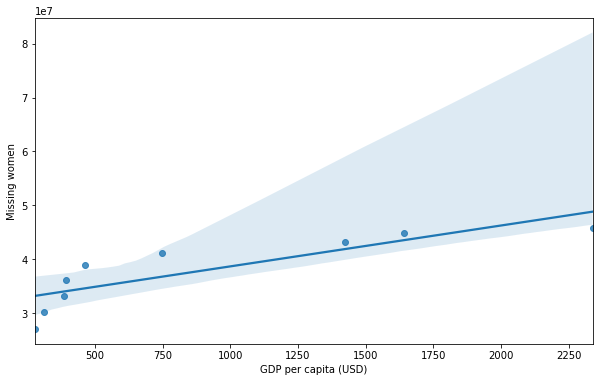

In [21]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.regplot(data = gdp_missing_in,
           x = gdp_missing_in["GDP per capita (USD)"],
           y = gdp_missing_in["Missing women"],
           ax = ax);